In [2]:
from main import *
import matplotlib.pyplot as plt
import time 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
population, score_evolution = run_simulation(generations=10, population_size=50, mutations_per_division=2, retall=True)

Generation  0 required 68 divisions to produce  49 acceptable cells
Generation  1 required 46 divisions to produce  44 acceptable cells
Generation  2 required 56 divisions to produce  48 acceptable cells
Generation  3 required 54 divisions to produce  49 acceptable cells
Generation  4 required 54 divisions to produce  48 acceptable cells
Generation  5 required 48 divisions to produce  46 acceptable cells
Generation  6 required 53 divisions to produce  49 acceptable cells
Generation  7 required 49 divisions to produce  49 acceptable cells
Generation  8 required 51 divisions to produce  49 acceptable cells
Generation  9 required 48 divisions to produce  48 acceptable cells


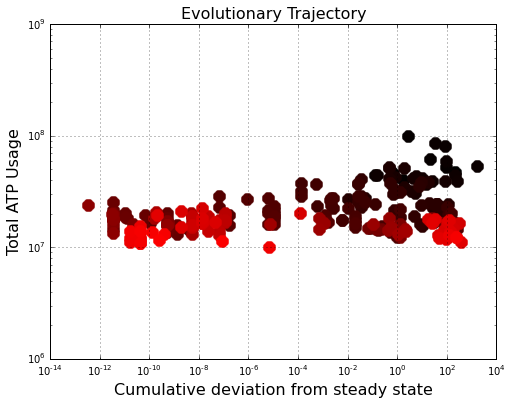

In [7]:
# ax1 = plot_1D_trajectory(score_evolution, obj=0)
ax2 = plot_2D_trajectory(score_evolution, obj=(0, 1))
ax2.set_xlim(1e-14, 1e4)
ax2.set_ylim(1e6, 1e9)

ax2.set_ylabel('Total ATP Usage')
ax2.set_xlabel('Cumulative deviation from steady state')

[2.4979294188652383e-10, 16694703.136574652]

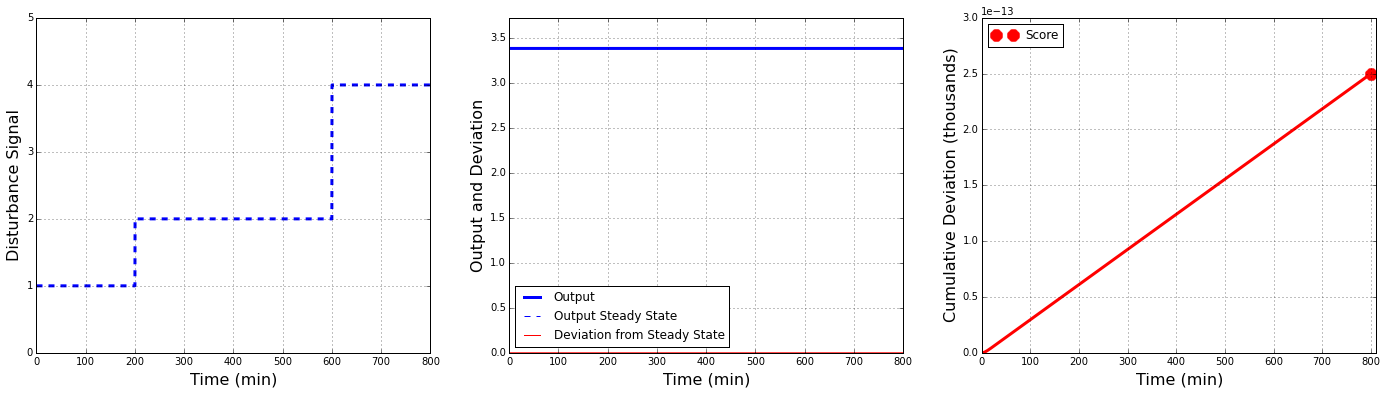

In [10]:
cell = population[0]
get_fitness_2(cell, input_node=2, output_node=1, plot=True)

In [11]:
interaction_check(cell, input_=2, output=1)

True

(array([  4.87075158e-01,   1.76142583e+00,   1.99786138e+00,
          1.90200502e+00,   2.03153609e+00,   1.99991100e+00,
          3.38333962e+00,   1.00386330e-01,   1.00142366e+00,
          3.11250835e+01,   1.16590371e+02]), 3.3833396162145899)

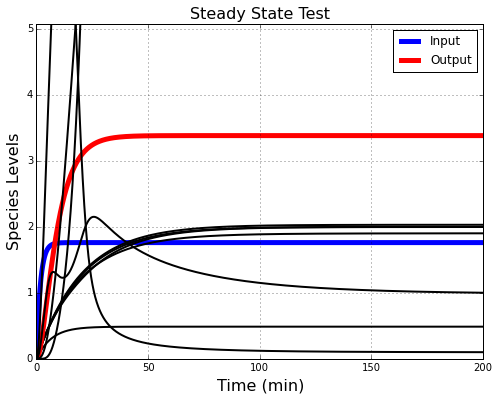

In [12]:
get_steady_states(cell, input_=2, output=1, plot=True)

(array([  4.87075158e-01,   1.76142583e+00,   1.99786138e+00,
          1.90200502e+00,   2.03153609e+00,   1.99991100e+00,
          3.38333962e+00,   1.00386330e-01,   1.00142366e+00,
          3.11250835e+01,   1.16590371e+02]), 3.3833396162145899)

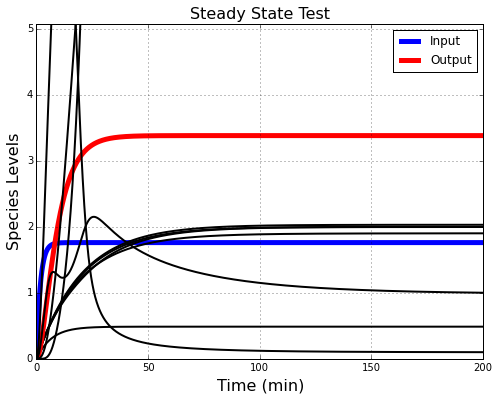

In [13]:
get_steady_states(cell, output=1, input_=2, plot=True)


3.38333961621


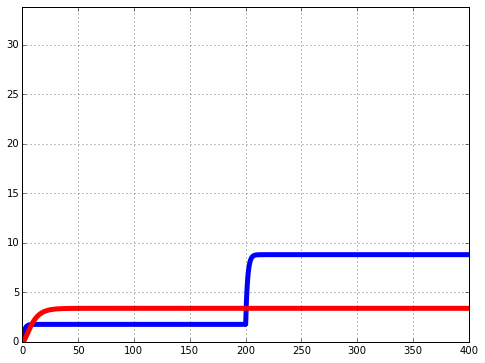

In [17]:
"""

USE THIS AS NUMERICAL CONNECTION CHECK?
"""


# if input node is specified, get steady state values following unit step input to unit node
input_signal = Signal(name='get_ss', duration=200, dt=0.1, channels=1)
input_signal.step(1)

second_signal = Signal(name='get_ss', duration=200, dt=0.1, channels=1)
second_signal.step(5)

third_signal = input_signal.merge_signals(second_signal, shift=True, gap=0.1)

states, _, key = cell.simulate(third_signal, input_node=2, mode='langevin', retall=True)


ax = create_subplot_figure(dim=(1, 1), size=(8, 6))[0]

reverse_key = {new_index: old_index for old_index, new_index in key.items()}
for state, trajectory in enumerate(states):

    # plot input
    if reverse_key[state] == 2:
        ax.plot(input_signal.time, trajectory, '-b', linewidth=5, label='Input')

    # plot output
    elif reverse_key[state] == 1:
        print(max(trajectory))
        ax.plot(input_signal.time, trajectory, '-r', linewidth=5, label='Output')
        ax.set_ylim(0, 10*np.max(trajectory))

In [24]:
interaction_check(cell, input_=2, output=1)

True

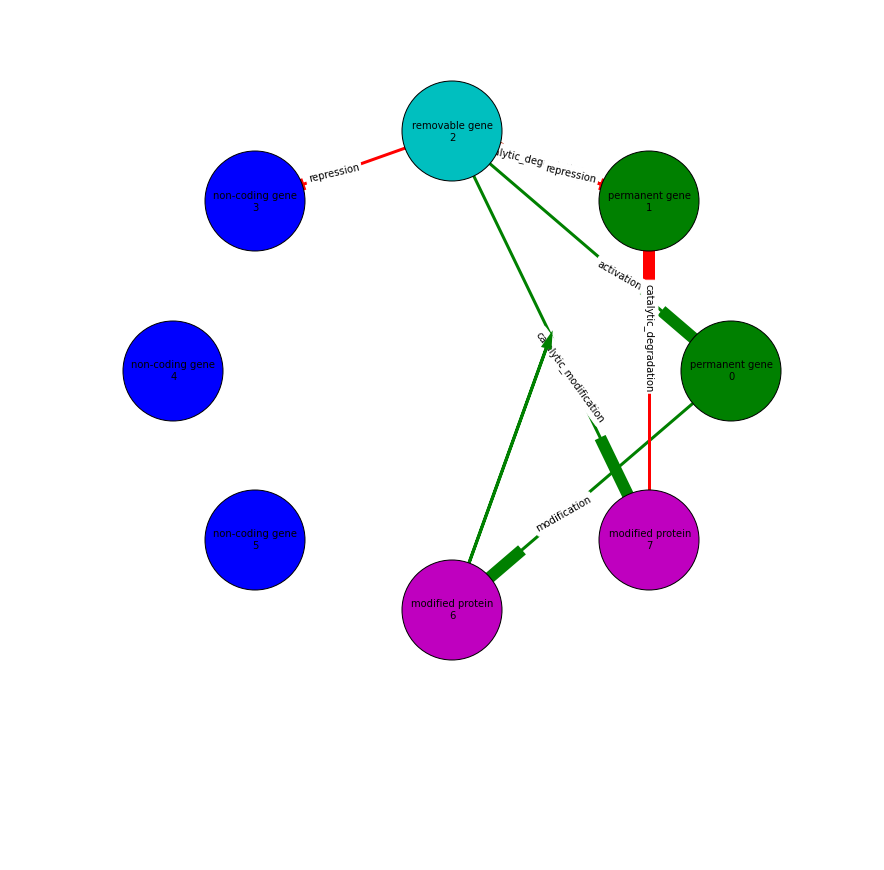

In [22]:
cell.show_topology(graph_layout='shell')

In [48]:
# list reactions
for rxn in cell.reactions:
    if rxn.rxn_type not in ['transcription', 'translation', 'mrna_decay', 'protein_decay']:
        print(rxn.rxn_type, rxn.reactants, rxn.products)

# list activation/repression edges
for mod in cell.rate_mods:
    print(mod.mod_type, mod.substrate, mod.target)

catalytic_degradation [1, 3] []
activation 3 0


In [35]:
# import pickle as pickle
# pickle.dump(population, open( "population.p", "wb" ) )
# pickle.dump(score_evolution, open( "score_evolution.p", "wb" ) )